# Assignment: Image Classification

# Imports

In [2]:
# !pip uninstall tf-keras
# !pip install tensorflow==2.16.1

In [3]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.8.0 Tensorflow Current Version: 2.18.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers, datasets, metrics

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.datasets import cifar10

random.seed(32)
np.random.seed(32)
tf.random.set_seed(32)


# Data Set

In [5]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


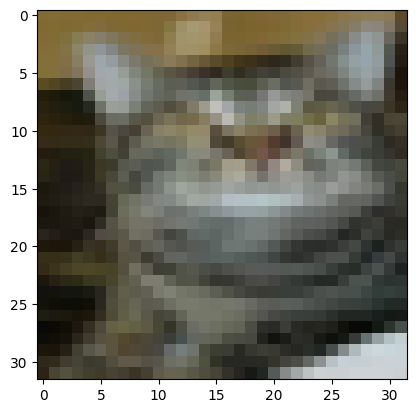

In [ ]:
random = np.random.randint(X_train.shape[0])
plt.imshow(X_train[random])
plt.show()



# Data Preparation

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_val  = X_val.astype("float32")  / 255.0

In [ ]:
def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):
    if batch_size is None:
        batch_size = len(X_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)
    return train_dataset, val_dataset

In [ ]:
train_ds, val_ds = prepare_datasets(X_train, X_val, y_train, y_val, batch_size=32)

# Model

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
model = Sequential([
    Input(shape=(32,32,3),),
    layers.Conv2D(64, (3,3), activation="relu"), # 30
    layers.Conv2D(64, (3,3), activation="relu"), # 28
    layers.MaxPooling2D(2,2), # 14
    layers.Conv2D(128, (3,3), activation="relu"), # 12
    layers.Conv2D(128, (3,3), activation="relu"), # 10
    layers.MaxPooling2D(2,2), # 5
    layers.Conv2D(256, (3,3), activation= "relu"), # 3
    layers.Conv2D(256, (3,3), activation="relu"), # 1
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")

])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[
        metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy"),
        metrics.AUC(name='auc', multi_label=True)
    ]
)


In [ ]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience = 5,
    verbose = 1
)

In [ ]:
model_checkpoints = ModelCheckpoint(
    filepath = "cifar10_model.keras",
    monitor= "val_loss",
    save_best_only = True,
    save_weights_only = False,
    verbose = 1
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=20,
    validation_data = val_ds,
    callbacks = [early_stopping, model_checkpoints]
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.5308 - loss: 1.8421 - sparse_categorical_accuracy: 0.3011
Epoch 1: val_loss improved from inf to 1.22176, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - auc: 0.5308 - loss: 1.8419 - sparse_categorical_accuracy: 0.3012 - val_auc: 0.4877 - val_loss: 1.2218 - val_sparse_categorical_accuracy: 0.5617
Epoch 2/20
1557/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.5020 - loss: 1.1248 - sparse_categorical_accuracy: 0.5988
Epoch 2: val_loss improved from 1.22176 to 1.01972, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - auc: 0.5020 - loss: 1.1245 - sparse_categorical_accuracy: 0.5989 - val_auc: 0.5317 - val_loss: 1.0197 - val_sparse_categorical_accuracy: 0.6383
Epoch 3/20
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.4955 - loss: 0.8792 - sparse_categorical_accuracy: 0.6911
Epoch 3: val_loss improved from 1.01972 to 0.83260, saving model to cifar10_model.ke

In [ ]:
val_loss, sparse_categorical_accuracy, auc = model.evaluate(val_ds, verbose=0)
print(f"Loss: {val_loss}")
print(f"Accuracy: {sparse_categorical_accuracy}")
print(f"AUC: {auc}")

Loss: 0.9573818445205688
Accuracy: 0.7418000102043152
AUC: 0.4993652403354645


model = Sequential([
    Input(shape=(32,32,3),),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")

])   ---> Accuracy: 0.7088000178337097

model = Sequential([
    Input(shape=(32,32,3),),
    layers.Conv2D(32, (3,3), activation="relu"), # 30
    layers.Conv2D(32, (3,3), activation="relu"), # 28
    layers.MaxPooling2D(2,2), # 14
    layers.Conv2D(64, (3,3), activation="relu"), # 12
    layers.MaxPooling2D(2,2), # 6
    layers.Conv2D(128, (3,3), activation= "relu"), # 4
    layers.MaxPooling2D(2,2), # 2
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")

]) ---> Accuracy: 0.7233999967575073

model = Sequential([
    Input(shape=(32,32,3),),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation= "relu"),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")

]) ---> Accuracy: 0.7340999841690063

model = Sequential([
    Input(shape=(32,32,3),),
    layers.Conv2D(64, (3,3), activation="relu"), # 30
    layers.Conv2D(64, (3,3), activation="relu"), # 28
    layers.MaxPooling2D(2,2), # 14
    layers.Conv2D(128, (3,3), activation="relu"), # 12
    layers.Conv2D(128, (3,3), activation="relu"), # 10
    layers.MaxPooling2D(2,2), # 5
    layers.Conv2D(256, (3,3), activation= "relu"), # 3
    layers.Conv2D(256, (3,3), activation="relu"), # 1
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")

]) ---> Accuracy: 0.7418000102043152


